In [ ]:
import time, re
import pandas as pd
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import NoSuchElementException
import math

In [ ]:
def initialize_driver(executable_path):

    s = Service(executable_path=executable_path)
    driver = webdriver.Chrome(service=s)
    driver.maximize_window()
    return driver

In [ ]:
def scrape_reviews(driver, url):

    driver.get(url)
    time.sleep(5)

    reviews_button = driver.find_element(By.CSS_SELECTOR,'#reviews-medley-footer > div.a-row.a-spacing-medium > a')
    href = reviews_button.get_attribute('href')

    star_rating = []
    review = []
    name = []
    review_title = []
    votes = []
    verified = []

    star_list = ["five_star", "four_star", "three_star", "two_star", "one_star"]

    for s in star_list:
        star_url = href+"&filterByStar="+s+"&pageNumber=1"
        driver.get(star_url)
        time.sleep(1)
        print(star_url)

        totals =  driver.find_element(By.CSS_SELECTOR, "#filter-info-section > div.a-row.a-spacing-base.a-size-base").text
        print(totals)
        total_ratings_match = re.search(r'([\d,]+) total ratings', totals)
        if total_ratings_match:

            total_ratings = int(total_ratings_match.group(1).replace(",", ""))  # Remove comma

            # Extract total reviews
            total_reviews_match = re.search(r'([\d,]+) with reviews', totals)
            if total_reviews_match:
                total_reviews = int(total_reviews_match.group(1).replace(",", ""))  # Remove comma
            
        n = math.ceil(total_reviews/10)

        for page in range(n):
            try:
                review_elements = driver.find_elements(By.CSS_SELECTOR,'i[data-hook="review-star-rating"] span.a-icon-alt')
                page_total_reviews = len(review_elements)
            except:
                page_total_reviews = 0
            
            for i in range(1, page_total_reviews + 1):
                try:
                    rating = driver.find_elements(By.CSS_SELECTOR,'i[data-hook="review-star-rating"] span.a-icon-alt')
                    rating = rating[i-1].get_attribute('innerHTML')
                    star = float(rating.split()[0])

                    rev = driver.find_element(By.XPATH, f"/html/body/div[1]/div[2]/div/div[1]/div/div[1]/div[5]/div[3]/div/div[{i+1}]/div/div/div[4]/span/span").text
                    rev_name = driver.find_element(By.XPATH, f"/html/body/div[1]/div[2]/div/div[1]/div/div[1]/div[5]/div[3]/div/div[{i+1}]/div/div/div[1]/a/div[2]/span").text
                    title = driver.find_element(By.XPATH, f"/html/body/div[1]/div[2]/div/div[1]/div/div[1]/div[5]/div[3]/div/div[{i+1}]/div/div/div[2]/a/span[2]").text
                    
                    try: helpful_votes =  driver.find_element(By.XPATH, f"/html/body/div[1]/div[2]/div/div[1]/div/div[1]/div[5]/div[3]/div/div[{i+1}]/div/div/div[5]/div/span[1]/div[1]/span").text
                    except: helpful_votes = '0 helpful votes'

                    try: verified_purchase = driver.find_element(By.XPATH, f"/html/body/div[1]/div[2]/div/div[1]/div/div[1]/div[5]/div[3]/div/div[{i+1}]/div/div/div[3]/a[2]/span").text
                    except: verified_purchase = 'Not a Verified Purchase'

                except Exception as e: print(e)

                star_rating.append(star)
                review.append(rev)
                name.append(rev_name)
                review_title.append(title)
                if helpful_votes == 'Helpful': votes.append('0 helpful votes')
                else: votes.append(helpful_votes)
                verified.append(verified_purchase)
            
            try:
                next_button = WebDriverWait(driver, 10).until(
                    EC.element_to_be_clickable((By.CSS_SELECTOR, '#cm_cr-pagination_bar > ul > li.a-last > a'))
                )

                next_button.click()
                time.sleep(1)
            except:
                break
    
    print(f'{url} is done')

    return star_rating, review, name, review_title, votes, verified

In [ ]:
def main():
    urls = ['https://www.amazon.com/dp/B0BYLJ3HH7?ref_=cm_sw_r_cp_ud_dp_K9518ZWP7QPY9CGBKXD3&th=1', 'https://www.amazon.com/dp/B09WZF9633?ref_=cm_sw_r_cp_ud_dp_4T7X35DYN1G52PX889BN_1&th=1',
            'https://www.amazon.com/dp/B08XYP6BJV?ref_=cm_sw_r_cp_ud_dp_FX17EPC24AF0YC1B2JX4_1', 'https://www.amazon.com/dp/B08M91FTJW?_encoding=UTF8&psc=1&ref_=cm_sw_r_cp_ud_dp_D4PC0KH8VM0MZ9RWQM8C',
            'https://www.amazon.com/dp/B07F3SNQT5?ref_=cm_sw_r_cp_ud_dp_YAM85QGN8A18TXN92KWV&th=1', 'https://www.amazon.com/dp/B0CLBV27N2?ref_=cm_sw_r_cp_ud_dp_G9F99MT1TGF7PC7D5HM6',
            'https://www.amazon.com/dp/B089TYDR5H?ref_=cm_sw_r_cp_ud_dp_KXGVA4KFVAT77G1J6PJ6', 'https://www.amazon.com/dp/B0007MZV3C?ref_=cm_sw_r_cp_ud_dp_BC28X8S1GE803Z5J2EMW',
            'https://www.amazon.com/dp/B0BVXDPZP3?ref_=cm_sw_r_cp_ud_dp_CM2YG40E4Y01Q2PRJ9N0', 'https://www.amazon.com/dp/B0074WGG82?ref_=cm_sw_r_cp_ud_dp_N977QKQM7GSCWK6MK4JP',
            'https://www.amazon.com/dp/B0CF3BDBL2?_encoding=UTF8&psc=1&ref_=cm_sw_r_cp_ud_dp_PV9BWYBQ750GN0H6V2YD', 'https://www.amazon.com/dp/B00T8AW9Z2?ref_=cm_sw_r_cp_ud_dp_6FHA5VANGACA5CFC9H68',
            'https://www.amazon.com/dp/B0C5NT72GS?ref_=cm_sw_r_cp_ud_dp_ZSHAFJ2Z1K3KPFNT7NXH', 'https://www.amazon.com/dp/B07TCQN5NZ?ref_=cm_sw_r_cp_ud_dp_D77QM8FAK1MGRT0V5GFC',
            'https://www.amazon.com/dp/B0B9YSJC5S?ref_=cm_sw_r_cp_ud_dp_NYQDHQ80S7GSFRDBSJK4', #'https://www.amazon.com/dp/B0BPD4JMWT?ref_=cm_sw_r_cp_ud_dp_EHQGA0G67JAF1T05AKBR',
            'https://www.amazon.com/dp/B01N1037CV?ref_=cm_sw_r_cp_ud_dp_7FZB3R32WMX4K75G33ZE', 'https://www.amazon.com/dp/B0C6BQVDX3?ref_=cm_sw_r_cp_ud_dp_398G1X22ZGM8V9MB24XK', 
            'https://www.amazon.com/dp/B08YS7QZLL?_encoding=UTF8&psc=1&ref_=cm_sw_r_cp_ud_dp_ZH9B4M6GG711HES4BND6','https://www.amazon.com/dp/B0B57QV5TT?ref_=cm_sw_r_cp_ud_dp_5FH4Z31TY8GAA00ER85Y', 
            'https://www.amazon.com/dp/B0BSP2QC9F?ref_=cm_sw_r_cp_ud_dp_MWXX9YJN7E8S0VXHQTNA_1','https://www.amazon.com/dp/B0BHKQ45VR?ref_=cm_sw_r_cp_ud_dp_9GPNMYNJHEP1J76QXEWF',
            'https://www.amazon.com/dp/B097BQZFCW?ref_=cm_sw_r_cp_ud_dp_ZPPVC1X8E6ZCFYZC0GV2', 'https://www.amazon.com/dp/B08LJVMZD8?ref_=cm_sw_r_cp_ud_dp_TV7802KH8XE44QTCCB8M',]

    driver = initialize_driver('C:/Users/uttar/OneDrive/Desktop/Data Mining/chromedriver.exe')

    all_review_dfs = []

    for url in urls:
        star_rating, review, name, review_title, votes, verified = scrape_reviews(driver, url)
        review_df = pd.DataFrame({
            'review_header': review_title,
            'reviewer_name': name,
            'review_content': review,
            'review_star_rating': star_rating,
            'review_helpful_votes': votes,
            'verified_purchase': verified
        })

        all_review_dfs.append(review_df)

    driver.quit()

    return all_review_dfs

In [ ]:
# Call the main function to get data for all URLs
all_review_dfs = main()

In [ ]:
all_review_dfs

In [ ]:
dfs = []

for i, df in enumerate(all_review_dfs):
    df.insert(0, 'productID', i+1)
    df.insert(1, 'prodSiteID', f"Amazon{i+1}")
    df.insert(2, 'ReviewID', range(1, len(df) + 1))
    dfs.append(df)
    #df.to_excel(f'../data/amazon_url_{i+1}_review_data.xlsx', index=False)
concatenated_df = pd.concat(dfs, ignore_index=True)

concatenated_df.to_excel("../data/Amazon_Star_Review_test.xlsx", index=False)
print("Concatenation complete. New Excel file created.")

In [ ]:
import re

# Read the Excel file
df = pd.read_excel('../data/Amazon_Star_Review_test.xlsx')

# Function to extract the number of helpful votes
def extract_helpful_votes(text):
    first_word = text.split()[0]
    if first_word.isdigit():
        return int(first_word)
    elif first_word.lower() == 'one':
        return 1
    else:
        return 0

# Apply the function to the 'Helpful_votes' column
df['review_helpful_votes'] = df['review_helpful_votes'].apply(extract_helpful_votes)

df['verified_purchase'] = df['verified_purchase'].apply(lambda x: True if x == 'Verified Purchase' else False)

final_df = df.drop_duplicates(inplace=True)

# Save the modified DataFrame back to Excel
final_df.to_excel('../data/Amazon_Star_Review_test.xlsx', index=False)

print("Edits complete. Excel file overwritten.")

### Texblob

In [19]:
import pandas as pd
import numpy as np

import nltk
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
from nltk.corpus import stopwords
nltk.download("stopwords")

import textblob
import matplotlib.pyplot as plt
import seaborn as sns 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\uttar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
reviews = pd.read_excel('../data/Amazon_Star_Review_test.xlsx')
products = pd.read_excel('../data/Amazon_Product_data_all.xlsx')

In [21]:
test_blob = textblob.TextBlob(products.loc[0]['product_details'])

In [22]:
products['description_subjectivity'] = None

In [23]:
stop = set(stopwords.words("english"))
for i,row in products.iterrows():
    blob = textblob.TextBlob(str(row['product_details']) + "\n" + str(row['product_specs']))

    subj = blob.subjectivity

    row['description_subjectivity'] = float(subj)
    products.loc[i] = row


#prods['product_price'] = prods['product_price'].str.replace('\$|,','',regex=True)

products.head()

,productID,prodSiteID,site,URL,product_title,product_details,product_specs,total_star_rating,total_reviews,product_price,description_subjectivity
0,1,amazon1,amazon,https://a.co/d/6pjCaNX,"Apple iPhone 14, 256GB, Blue - Unlocked (Renew...",Vibrant 6.1-inch Super Retina XDR display with...,Brand - Apple\nModel Name - iPhone 14\nWireles...,4.2,101,664.71,0.497845
1,2,amazon2,amazon,https://a.co/d/ie6e7bD,Renewed Samsung Galaxy S22 Ultra 512GB - 8K Ca...,"6.8"", 1440 x 3088pixels, Infinity-O FHD+ Dynam...",Brand - SAMSUNG\nModel Name - Galaxy S22 Ultra...,4.2,356,619.50,0.362857
2,3,amazon3,amazon,https://a.co/d/0dZiHJC,HP DeskJet 2755e Wireless Color inkjet-printer...,PERFECT FOR HOME – Best for printing basic col...,Brand - HP\nConnectivity Technology - Wireless...,4.1,8044,49.89,0.594556
3,4,amazon4,amazon,https://a.co/d/17mJ1Ve,JBL Flip 5: Portable Wireless Bluetooth Speake...,Up to 20W of Audio Power | Bluetooth 4.2 Techn...,Brand - JBL\nModel Name - JBL Flip 5\nSpeaker ...,4.8,365,89.95,0.651587
4,5,amazon5,amazon,https://a.co/d/caDKBgC,"Microsoft 365 Family | 12-Month Subscription, ...",With 12 months of Microsoft 365 for up to six ...,Platform: Subscription (PC/Mac)\nEdition: Micr...,4.4,305,99.99,0.504762


In [24]:
products.info()
products['description_subjectivity'] = products['description_subjectivity'].astype(float)
products.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   productID                 24 non-null     int64  
 1   prodSiteID                24 non-null     object 
 2   site                      24 non-null     object 
 3   URL                       24 non-null     object 
 4   product_title             24 non-null     object 
 5   product_details           24 non-null     object 
 6   product_specs             24 non-null     object 
 7   total_star_rating         24 non-null     float64
 8   total_reviews             24 non-null     int64  
 9   product_price             24 non-null     float64
 10  description_subjectivity  24 non-null     object 
dtypes: float64(2), int64(2), object(7)
memory usage: 2.2+ KB


,count,mean,std,min,25%,50%,75%,max
productID,24.0,12.500000,7.071068,1.000000,6.75000,12.500000,18.250000,24.000000
total_star_rating,24.0,4.412500,0.328782,3.400000,4.20000,4.400000,4.600000,4.900000
total_reviews,24.0,900.625000,2013.992052,9.000000,116.75000,308.500000,393.250000,8044.000000
product_price,24.0,214.682917,350.567961,3.350000,37.88500,69.965000,296.747500,1596.000000
description_subjectivity,24.0,0.535126,0.107928,0.362857,0.47083,0.508966,0.618155,0.774242


In [25]:
reviews[['review_subjectivity','review_polarity']] = None,None
for i,row in reviews.iterrows():
    blob = textblob.TextBlob(str(row['review_content']))
    row[['review_subjectivity','review_polarity']] = float(blob.subjectivity),float(blob.polarity)
    reviews.loc[i] = row

In [26]:
reviews['review_length'] = reviews['review_content'].str.len()

reviews

,productID,prodSiteID,ReviewID,review_header,reviewer_name,review_content,review_star_rating,review_helpful_votes,verified_purchase,review_subjectivity,review_polarity,review_length
0,1,Amazon1,1,It is renewed but looked like new,Andre,"It was packaged very well, Amazon packaging, n...",5,1,True,0.604943,0.273504,282.0
1,1,Amazon1,2,Worth it,Alice,"The phone came in perfect conditions, without ...",5,2,True,0.513636,0.484091,138.0
2,1,Amazon1,3,Amazon Warehouse for the Win!,Mrs. K,I got a great deal on this at Amazon Warehouse...,5,2,True,0.570455,0.333636,373.0
3,1,Amazon1,4,Awesome,David Chaves Rojas,"Got my phone, 10/10. No scratches, still have ...",5,0,True,0.0,0.0,83.0
4,1,Amazon1,5,Like new iPhone 14,Rick,The iPhone 14 came with a battery that had 100...,5,0,True,0.727273,0.568182,170.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5348,24,Amazon24,373,Anonymous,roxanna,Only received part of the sofa. Should I expec...,1,2,True,1.0,0.0,64.0
5349,24,Amazon24,374,Do not buy very uncomfortable,Savannah,Very small and uncomfortable,1,1,True,0.76,-0.4125,28.0
5350,24,Amazon24,375,Nice,Linda,Parts were not marked,1,2,True,0.6,-0.05,21.0
5351,24,Amazon24,376,Incomplete shipping,James brown,Only came with one half,1,8,True,0.583333,-0.083333,23.0


In [27]:
reviews["review_star_rating"].describe()

count    5353.000000
mean        3.339623
std         1.578334
min         1.000000
25%         2.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: review_star_rating, dtype: float64

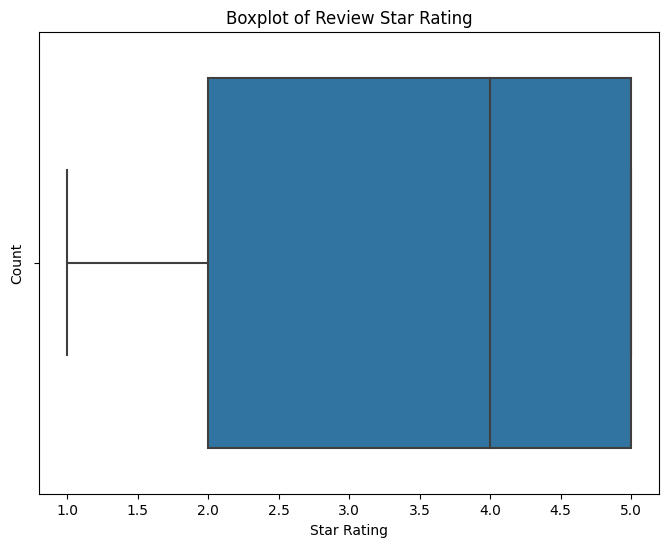

In [28]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='review_star_rating', data=reviews)
plt.title('Boxplot of Review Star Rating')
plt.xlabel('Star Rating')
plt.ylabel('Count')
plt.show()

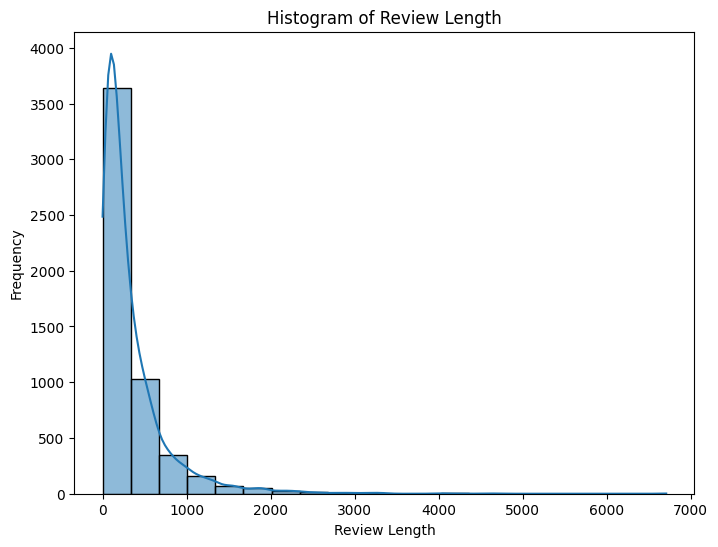

In [29]:
plt.figure(figsize=(8, 6))
sns.histplot(reviews['review_length'], bins=20, kde=True)
plt.title('Histogram of Review Length')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

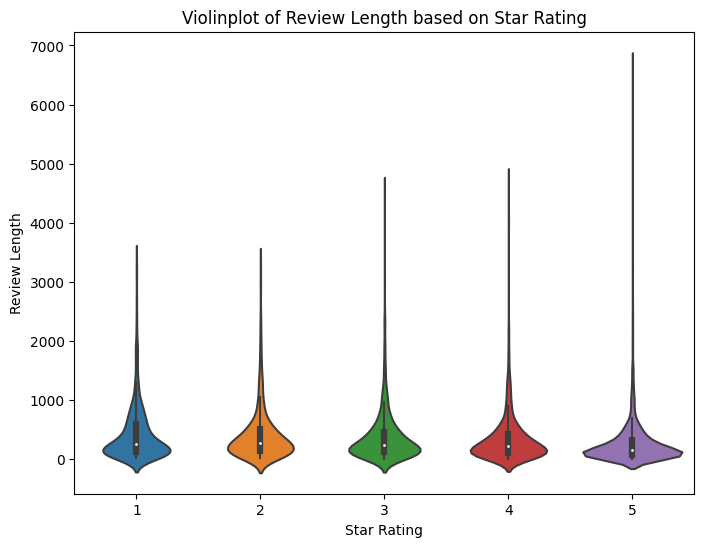

In [30]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='review_star_rating', y='review_length', data=reviews)
plt.title('Violinplot of Review Length based on Star Rating')
plt.xlabel('Star Rating')
plt.ylabel('Review Length')
plt.show()

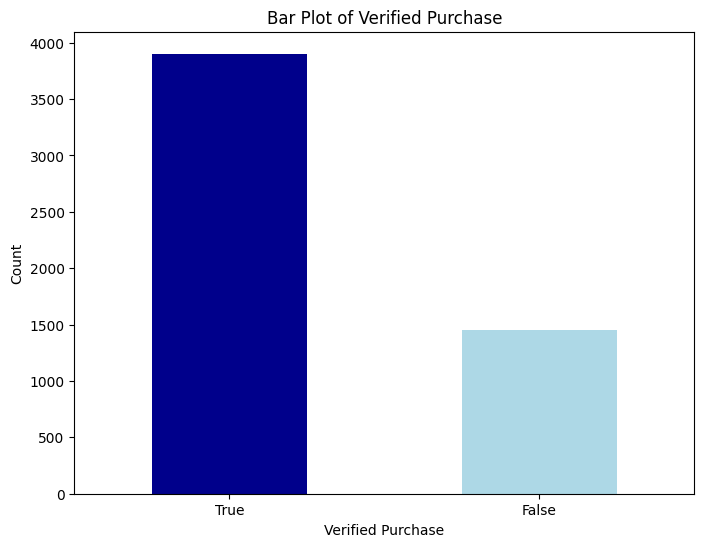

In [31]:
purchase_counts = reviews['verified_purchase'].value_counts()

# Plotting the bar plot
plt.figure(figsize=(8, 6))
purchase_counts.plot(kind='bar', color=['darkblue', 'lightblue'])
plt.title('Bar Plot of Verified Purchase')
plt.xlabel('Verified Purchase')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['True', 'False'], rotation=0)
plt.show()

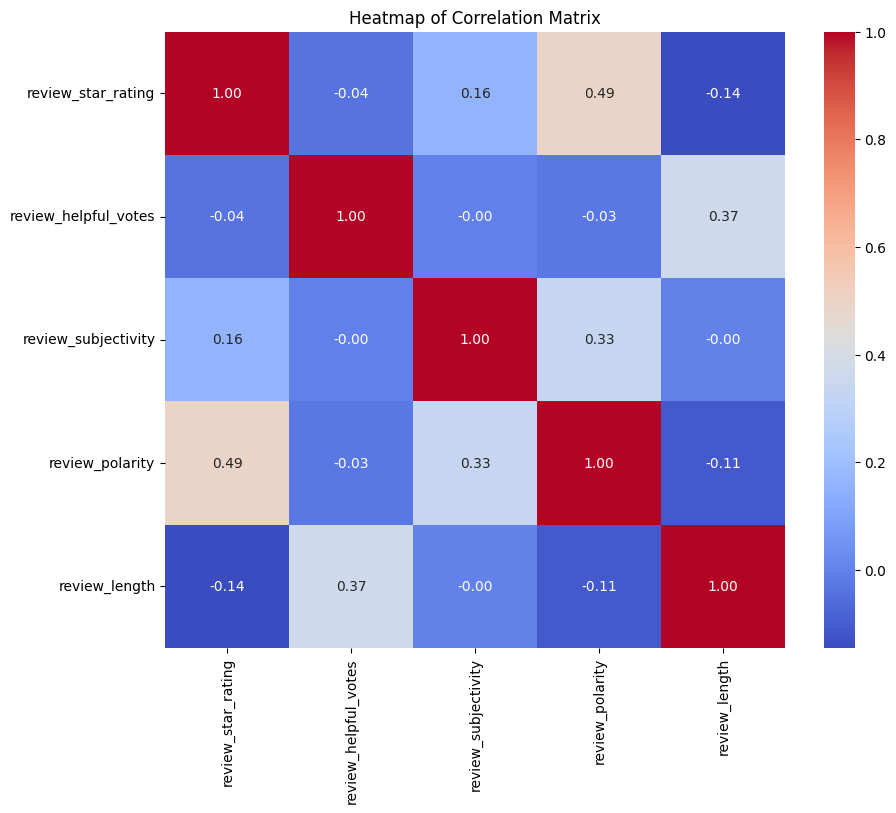

In [32]:
corr_matrix = reviews[["review_star_rating", "review_helpful_votes", "review_subjectivity", "review_polarity","review_length"]].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Correlation Matrix')
plt.show()

In [33]:
reviews.to_excel("../data/Amazon_reviews_with_scores.xlsx", index=False)

In [34]:
x = reviews.groupby('productID',as_index=False).agg({
    'review_helpful_votes':'mean',
    'review_subjectivity':'mean',
    'review_polarity':'mean',
    'review_length':'mean'
}
)

x.merge(right=products,how='left',on='productID')[
    ['product_title','URL','review_helpful_votes','review_subjectivity',
     'review_polarity','review_length','description_subjectivity','total_star_rating'
     ]
]

,product_title,URL,review_helpful_votes,review_subjectivity,review_polarity,review_length,description_subjectivity,total_star_rating
0,"Apple iPhone 14, 256GB, Blue - Unlocked (Renew...",https://a.co/d/6pjCaNX,2.990000,0.451151,0.229201,195.720000,0.497845,4.2
1,Renewed Samsung Galaxy S22 Ultra 512GB - 8K Ca...,https://a.co/d/ie6e7bD,2.448669,0.486779,0.1833,282.641221,0.362857,4.2
2,HP DeskJet 2755e Wireless Color inkjet-printer...,https://a.co/d/0dZiHJC,8.714000,0.519736,0.126956,707.686000,0.594556,4.1
3,JBL Flip 5: Portable Wireless Bluetooth Speake...,https://a.co/d/17mJ1Ve,1.250000,0.504857,0.263525,166.896739,0.651587,4.8
4,"Microsoft 365 Family | 12-Month Subscription, ...",https://a.co/d/caDKBgC,3.544747,0.498702,0.149167,246.439689,0.504762,4.4
5,"TurboTax Basic 2023 Tax Software, Federal Tax ...",https://a.co/d/9k8jeeq,4.000000,0.458836,0.093636,483.982759,0.636756,3.4
6,Hamilton Beach 24782 Retro Toaster with Wide S...,https://a.co/d/axNX0X4,0.769231,0.517108,0.167288,174.679487,0.410979,4.3
7,Razor MX350 Dirt Rocket Electric Motocross Off...,https://a.co/d/cl8WTkW,2.480412,0.478048,0.122968,366.927835,0.400794,4.6
8,LG C3 Series 65-Inch Class OLED evo 4K Process...,https://a.co/d/9gONFTO,5.064039,0.529396,0.225131,515.443350,0.481819,4.6
9,GE APPLIANCES JES1460DSBB Countertop Microwave...,https://a.co/d/gFMRAR9,2.960317,0.455671,0.154553,324.611111,0.615873,4.2


In [35]:
reviews['review_polarity'] = reviews['review_polarity'].astype(float)
reviews['review_subjectivity'] = reviews['review_subjectivity'].astype(float)
reviews.describe().T

,count,mean,std,min,25%,50%,75%,max
productID,5353.0,12.159163,7.523883,1.0,6.0,11.000000,20.000000,24.0
ReviewID,5353.0,158.674015,118.367589,1.0,63.0,132.000000,233.000000,500.0
review_star_rating,5353.0,3.339623,1.578334,1.0,2.0,4.000000,5.000000,5.0
review_helpful_votes,5353.0,2.988418,16.710626,0.0,0.0,0.000000,1.000000,637.0
review_subjectivity,5353.0,0.502311,0.223706,0.0,0.4,0.514811,0.627778,1.0
review_polarity,5353.0,0.160023,0.276481,-1.0,0.0,0.132664,0.306250,1.0
review_length,5351.0,337.986545,427.565157,1.0,87.0,198.000000,423.500000,6709.0


c:\Users\uttar\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


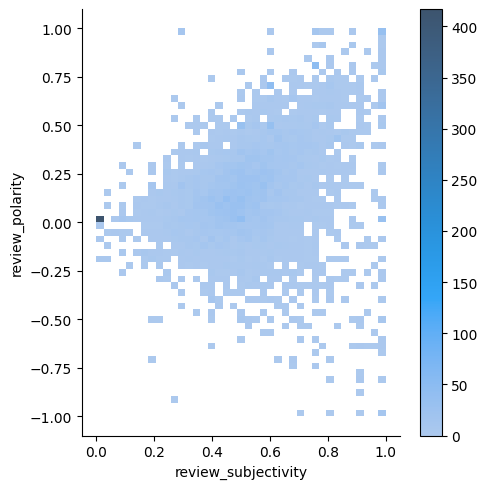

In [36]:
sns.displot(
    data=reviews,
    x='review_subjectivity',y='review_polarity',cbar=True
)

### Additional ideas:
1. Violin Plots (e.g. same product, two different websites)
2. Bar plot Review polarity (avg) of the smae product, accross all 3 websites
3. Verified purchase barplot for a combined data (amazon, best-buy and target)
